In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-traffic/network_traffic.csv


In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Load dataset with specific encoding
data = pd.read_csv("/kaggle/input/network-traffic/network_traffic.csv", encoding='ISO-8859-1')

# Inspect the actual column names in the dataset
print(data.columns)


Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')


In [18]:
# Select relevant features for anomaly detection
selected_features = ['Source', 'Destination', 'Protocol', 'Length']

# Check if the selected features exist in the dataset
print(data[selected_features].head())


            Source      Destination Protocol  Length
0  192.168.229.254   192.168.202.79    TLSv1     117
1   192.168.202.79  192.168.229.254    TLSv1     269
2   192.168.202.79  192.168.229.251      TCP      70
3  192.168.229.254   192.168.202.79      TCP      70
4   192.168.202.79  192.168.229.251      TCP      78


In [20]:
# Handle categorical columns by encoding them
encoder = LabelEncoder()

# Apply Label Encoding to 'Source', 'Destination', and 'Protocol'
data['Source'] = encoder.fit_transform(data['Source'])
data['Destination'] = encoder.fit_transform(data['Destination'])
data['Protocol'] = encoder.fit_transform(data['Protocol'])

# Ensure selected features are now numeric
print(data[selected_features].head())


   Source  Destination  Protocol  Length
0     118          199       101     117
1      35          925       101     269
2      35          922        98      70
3     118          199        98      70
4      35          922        98      78


In [21]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_features])


In [23]:
# Train an Isolation Forest model for anomaly detection (zero-day exploit detection)
model = IsolationForest(contamination=0.01, random_state=42, n_jobs=-1)  # Using all CPU cores
model.fit(scaled_data)


IsolationForest(contamination=0.01, n_jobs=-1, random_state=42)

In [24]:
# Predict anomalies (-1 means anomaly, 1 means normal)
predictions = model.predict(scaled_data)

# Add the predictions to the original dataset for review
data['Anomaly'] = predictions


In [25]:
# Display a portion of the results
print(data[['Source', 'Destination', 'Protocol', 'Length', 'Anomaly']].head())

# Filter out anomalies (rows where 'Anomaly' is -1)
anomalies = data[data['Anomaly'] == -1]

# Display the anomalies
print(anomalies.head())

# Check how many anomalies were detected
num_anomalies = anomalies.shape[0]
print(f"Number of anomalies detected: {num_anomalies}")


   Source  Destination  Protocol  Length  Anomaly
0     118          199       101     117        1
1      35          925       101     269        1
2      35          922        98      70        1
3     118          199        98      70        1
4      35          922        98      78        1
       No.  Time  Source  Destination  Protocol  Length  \
48      49  0.01      91         2615        22      78   
174    175  0.06      67         2615        22      78   
175    176  0.06      12          164        17     346   
326    327  0.12      60         2615        22      78   
1193  1194  0.46     112         2615        22      78   

                                           Info  Anomaly  
48                                        Hello       -1  
174                                       Hello       -1  
175   DHCP Request  - Transaction ID 0x3fa13076       -1  
326                                       Hello       -1  
1193                                      Hello   

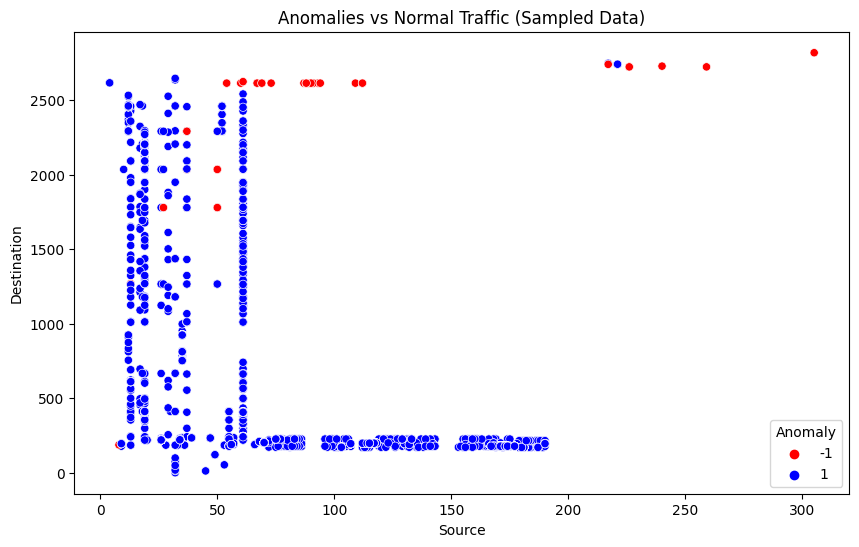

In [30]:
# Sample a subset of the data for faster plotting
sampled_data = data.sample(n=10000, random_state=42)

# Plot the sampled data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sampled_data['Source'], y=sampled_data['Destination'], hue=sampled_data['Anomaly'], palette={1: 'blue', -1: 'red'})
plt.title('Anomalies vs Normal Traffic (Sampled Data)')
plt.xlabel('Source')
plt.ylabel('Destination')
plt.show()


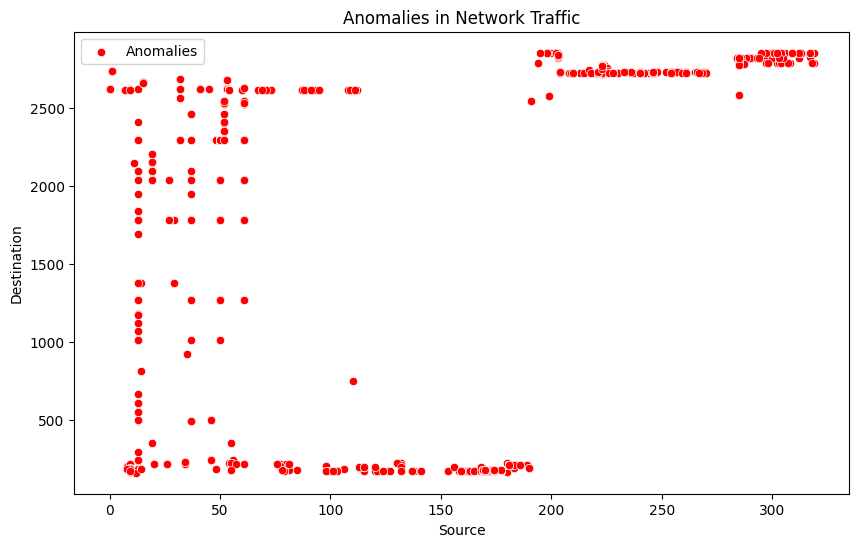

In [31]:
# Plot only anomalies
anomalies_sampled = anomalies.sample(n=10000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=anomalies_sampled['Source'], y=anomalies_sampled['Destination'], color='red', label='Anomalies')
plt.title('Anomalies in Network Traffic')
plt.xlabel('Source')
plt.ylabel('Destination')
plt.legend()
plt.show()


In [33]:
# Export anomalies to a CSV file
anomalies.to_csv("anomalies_detected.csv", index=False)
print("Anomalies exported to 'anomalies_detected.csv'")


Anomalies exported to 'anomalies_detected.csv'


In [35]:
df=pd.read_csv('anomalies_detected.csv')

In [37]:
print(df.head())

    No.  Time  Source  Destination  Protocol  Length  \
0    49  0.01      91         2615        22      78   
1   175  0.06      67         2615        22      78   
2   176  0.06      12          164        17     346   
3   327  0.12      60         2615        22      78   
4  1194  0.46     112         2615        22      78   

                                        Info  Anomaly  
0                                      Hello       -1  
1                                      Hello       -1  
2  DHCP Request  - Transaction ID 0x3fa13076       -1  
3                                      Hello       -1  
4                                      Hello       -1  


In [34]:
# Calculate the percentage of anomalies
total_data_points = data.shape[0]
anomaly_percentage = (num_anomalies / total_data_points) * 100
print(f"Percentage of anomalies detected: {anomaly_percentage:.2f}%")


Percentage of anomalies detected: 0.98%


In [5]:
print(data.columns)


Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')
